In [32]:
import numpy as np
from minisom import MiniSom
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
import pandas as pd
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.mixture import GaussianMixture
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

1. SOM

In [12]:
csv_file_path = "PokemonDB.csv"
dataframe = pd.read_csv(csv_file_path)

In [13]:
selected_features = ["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]
X = dataframe[selected_features].values

In [14]:
map_size = (5, 5)  # SOM 맵의 크기
input_len = X.shape[1]  # 입력 데이터의 길이
som = MiniSom(map_size[0], map_size[1], input_len, sigma=0.3, learning_rate=0.5)


In [15]:
som.train_batch(X, 100000)

In [16]:
cluster_labels = np.zeros(len(X), dtype=int)
for i, x in enumerate(X):
    w = som.winner(x)
    cluster_labels[i] = np.ravel_multi_index(w, map_size)

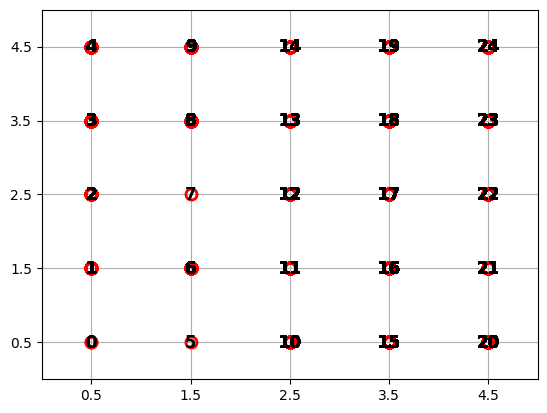

In [17]:
for i, x in enumerate(X):
    w = som.winner(x)
    plt.plot(w[0] + 0.5, w[1] + 0.5, 'o', markerfacecolor='None',
             markeredgecolor='red', markersize=8, markeredgewidth=2)
    plt.text(w[0] + 0.5, w[1] + 0.5, str(cluster_labels[i]),
             color='black', fontdict={'weight': 'bold', 'size': 12},
             horizontalalignment='center', verticalalignment='center')
    # 격자 유닛의 좌표 설정
plt.xticks(np.arange(0.5, map_size[0], 1))
plt.yticks(np.arange(0.5, map_size[1], 1))
plt.xlim([0, map_size[0]])
plt.ylim([0, map_size[1]])
plt.grid(True)

# 시각화 결과 출력
plt.show()

In [18]:
clusters = {}
for i, label in enumerate(cluster_labels):
    if label not in clusters:
        clusters[label] = []
    clusters[label].append(dataframe.iloc[i]["Name"])

In [19]:
for label, pokemon_list in clusters.items():
    print(f"Cluster {label}:")
    for pokemon in pokemon_list:
        print(pokemon)
    print()

Cluster 6:
Bulbasaur
Ivysaur
Squirtle
Butterfree
Clefairy
Oddish
Gloom
Psyduck
Abra
Tentacool
Magnemite
Seel
Gastly
Drowzee
Exeggcute
Staryu
Porygon
Omanyte
Chikorita
Ledyba
Ledian
Cleffa
Togepi
Mareep
Flaaffy
Unown
Slugma
Houndour
Smoochum
Torchic
Combusken
Beautifly
Dustox
Lombre
Kirlia
Shroomish
Illumise
Roselia
Gulpin
Numel
Spoink
Cacnea
Swablu
Baltoy
Lileep
Snorunt
Spheal
Clamperl
Piplup
Prinplup
Budew
Cherubi
Shellos
Chingling
Mime Jr.
Mantyke
Snover
Oshawott
Munna
Petilil
Yamask
Zorua
Zorua
Gothita
Gothorita
Solosis
Duosion
Vanillite
Vanillish
Foongus
Frillish
Joltik
Elgyem
Litwick
Lampent
Fennekin
Braixen
Litleo
Flabébé
Floette
Espurr
Spritzee
Swirlix
Skrelp
Clauncher
Amaura
Goomy
Phantump
Popplio
Dewpider
Morelull
Dottler
Sinistea
Hatenna
Hattrem
Milcery
Fuecoco
Smoliv
Dolliv
Toedscool
Glimmet
Gimmighoul

Cluster 19:
Venusaur
Blastoise
Ninetales
Tentacruel
Dewgong
Hypno
Mr. Mime
Flareon
Articuno
Moltres
Meganium
Noctowl
Politoed
Umbreon
Mantine
Suicune
Lugia
Ludicolo
Grumpig
A

DBSCAN

In [20]:
# 필요한 attribute 선택
attributes = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']
X = dataframe[attributes].values

In [21]:
# 데이터 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [22]:
# 차원 축소 (여기서는 PCA 사용)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
X_pca

array([[-1.62736252,  0.00826117],
       [-0.44525228, -0.06455318],
       [ 1.18432175, -0.13653741],
       ...,
       [ 1.81191189, -1.35573739],
       [ 2.98216353, -0.5764798 ],
       [ 3.01565282, -1.28025314]])

In [23]:
# DBSCAN 모델 생성 및 군집화
dbscan = DBSCAN(eps=0.7, min_samples=4)
dbscan.fit(X_pca)

DBSCAN(eps=0.7, min_samples=4)

In [24]:
# 군집 결과 확인
labels = dbscan.labels_
dataframe['Cluster'] = labels

In [25]:
# 결과 출력

dataframe[['Name', 'Cluster']]

,Name,Cluster
0,Bulbasaur,0
1,Ivysaur,0
2,Venusaur,0
3,Venusaur,0
4,Charmander,0
...,...,...
1185,Chi-Yu,0
1186,Roaring Moon,0
1187,Iron Valiant,0
1188,Koraidon,0


In [81]:
import pandas as pd
from sklearn.mixture import GaussianMixture

# Load the data
data = pd.read_csv('pokemonDB.csv')
stats = data[["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]]

# Set the range of cluster numbers to evaluate
min_clusters = 1
max_clusters = 10

# Initialize variables
best_bic = float('inf')
best_n_components = -1

# Iterate over different cluster numbers
for n_components in range(min_clusters, max_clusters+1):
    # Create and train GMM model
    gmm = GaussianMixture(n_components=n_components)
    gmm.fit(stats)

    # Calculate BIC
    bic = gmm.bic(stats)

    # Update best BIC and number of components if necessary
    if bic < best_bic:
        best_bic = bic
        best_n_components = n_components

# Print the best number of components
print("Best number of components:", best_n_components)

Best number of components: 4


In [80]:
import pandas as pd
from sklearn.mixture import GaussianMixture

# Load the data
data = pd.read_csv('pokemonDB.csv')
stats = data[["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]]

# Set the range of cluster numbers to evaluate
min_clusters = 1
max_clusters = 10

# Initialize variables
best_aic = float('inf')
best_n_components = -1

# Iterate over different cluster numbers
for n_components in range(min_clusters, max_clusters+1):
    # Create and train GMM model
    gmm = GaussianMixture(n_components=n_components)
    gmm.fit(stats)

    # Calculate AIC
    aic = gmm.aic(stats)

    # Update best AIC and number of components if necessary
    if aic < best_aic:
        best_aic = aic
        best_n_components = n_components

# Print the best number of components
print("Best number of components:", best_n_components)


Best number of components: 10


In [76]:

data = pd.read_csv('pokemonDB.csv')
stats = data[["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]]

gmm = GaussianMixture(n_components=4)  # Set the number of clusters
gmm.fit(stats)

GaussianMixture(n_components=4)

c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


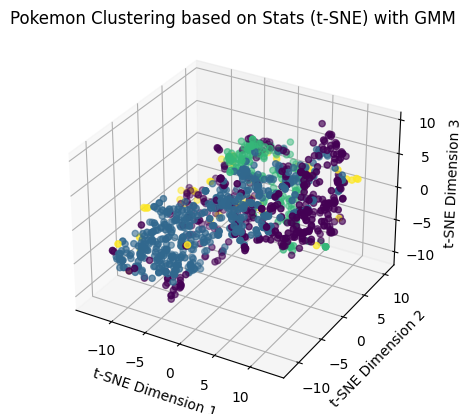

In [77]:
cluster_labels = gmm.predict(stats)

# t-SNE for dimensionality reduction to 3D
tsne = TSNE(n_components=3, random_state=42)
tsne_data = tsne.fit_transform(stats)

# Cluster visualization in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(tsne_data[:, 0], tsne_data[:, 1], tsne_data[:, 2], c=cluster_labels, cmap='viridis')
ax.set_xlabel('t-SNE Dimension 1')
ax.set_ylabel('t-SNE Dimension 2')
ax.set_zlabel('t-SNE Dimension 3')
ax.set_title('Pokemon Clustering based on Stats (t-SNE) with GMM')
plt.show()




In [78]:
for cluster in range(gmm.n_components):
    print(f"Cluster {cluster+1}:")
    cluster_pokemon = data.loc[cluster_labels == cluster, 'Name']
    print(cluster_pokemon)
    print()

Cluster 1:
2           Venusaur
3           Venusaur
7          Charizard
8          Charizard
11         Blastoise
            ...     
1185          Chi-Yu
1186    Roaring Moon
1187    Iron Valiant
1188        Koraidon
1189        Miraidon
Name: Name, Length: 403, dtype: object

Cluster 2:
0        Bulbasaur
1          Ivysaur
4       Charmander
5       Charmeleon
6        Charizard
           ...    
1176      Frigibax
1177      Arctibax
1178    Baxcalibur
1180    Gimmighoul
1183     Chien-Pao
Name: Name, Length: 530, dtype: object

Cluster 3:
19         Beedrill
39        Sandslash
47         Clefable
58        Vileplume
82        Poliwrath
           ...     
1160      Farigiraf
1161    Dudunsparce
1162    Dudunsparce
1164     Great Tusk
1172     Iron Hands
Name: Name, Length: 181, dtype: object

Cluster 4:
52      Jigglypuff
53      Wigglytuff
95         Geodude
96         Geodude
97        Graveler
           ...    
1110         Nacli
1153      Cetoddle
1156       Dondozo
1159 

In [73]:
cluster_pokemon = {}
for cluster in range(gmm.n_components):
    cluster_pokemon[cluster] = data.loc[cluster_labels == cluster, 'Name']

for cluster, pokemon_list in cluster_pokemon.items():
    with open(f'cluster{cluster+1}_pokemon.txt', 'w', encoding='utf-8') as file:
        file.write(f"Cluster {cluster+1}:\n")
        for pokemon in pokemon_list:
            file.write(pokemon + '\n')